In [1]:
import pandas as pd

df_diabetes = pd.read_csv('diabetes.csv')
print(df_diabetes.shape)
df_diabetes.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [2]:
target_column = ['Diabetes'] 
predictors = list(set(list(df_diabetes.columns))-set(target_column))
print(predictors)

['SkinThickness', 'BloodPressure', 'Glucose', 'BMI', 'Insulin', 'DiabetesPedigreeFunction', 'Pregnancies', 'Age']


In [3]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()

df_std = df_diabetes.copy()

df_std[predictors] = transformer.fit_transform(df_diabetes[predictors])
df_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,-6.476301e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,-9.251859e-18,1.000652,-3.783654,-0.685236,-0.121888,0.605771,2.444478
BloodPressure,768.0,1.503427e-17,1.000652,-3.572597,-0.367337,0.149641,0.563223,2.734528
SkinThickness,768.0,1.006140e-16,1.000652,-1.288212,-1.288212,0.154533,0.719086,4.921866
Insulin,768.0,-3.006854e-17,1.000652,-0.692891,-0.692891,-0.428062,0.412008,6.652839
BMI,768.0,2.590520e-16,1.000652,-4.060474,-0.595578,0.000942,0.584771,4.455807
DiabetesPedigreeFunction,768.0,2.451743e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,1.931325e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716
Diabetes,768.0,3.489583e-01,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [4]:
from sklearn.model_selection import train_test_split

X_std = df_std[predictors].values
y_std = df_std[target_column].values

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size=0.30, random_state=12)
print(X_train_std.shape)
print(X_test_std.shape)

(537, 8)
(231, 8)


C:\Users\hroat\AppData\Local\conda\conda\envs\R_Studio\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



              precision    recall  f1-score   support

           0       0.80      0.82      0.81       147
           1       0.67      0.64      0.65        84

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231




C:\Users\hroat\AppData\Local\conda\conda\envs\R_Studio\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\hroat\AppData\Local\conda\conda\envs\R_Studio\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hroat\AppData\Local\conda\conda\envs\R_Studio\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or Confu

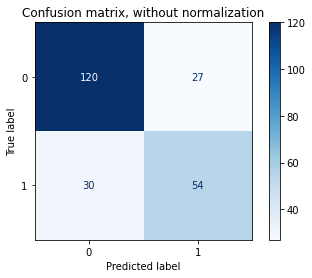

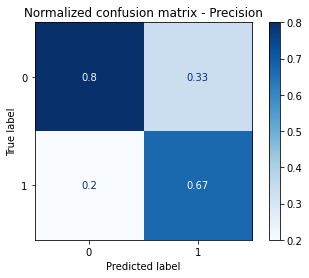

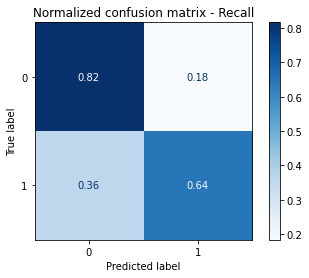

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

mlp_std = MLPClassifier(hidden_layer_sizes=(8,8,8),
                        activation='relu',
                        solver='adam',
                        max_iter=500,
                        random_state=40                        
                       )
mlp_std.fit(X_train_std, y_train_std)
predict_test_std = mlp_std.predict(X_test_std)

print()
print(classification_report(y_test_std,predict_test_std))
print()

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix - Precision", 'pred'),
                 ("Normalized confusion matrix - Recall", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mlp_std, X_test_std, y_test_std,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)

plt.show()

In [6]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()

df_norm = df_diabetes.copy()

df_norm[predictors] = transformer.fit_transform(df_diabetes[predictors])
df_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.022645,0.020956,0.00000,0.006476,0.016716,0.033330,0.117208
Glucose,768.0,0.682903,0.161166,0.00000,0.587637,0.704501,0.801606,0.973682
BloodPressure,768.0,0.402801,0.153428,0.00000,0.317522,0.430685,0.511070,0.848036
SkinThickness,768.0,0.112086,0.092546,0.00000,0.000000,0.114464,0.181524,0.419691
Insulin,768.0,0.318921,0.338570,0.00000,0.000000,0.249215,0.632833,0.970458
BMI,768.0,0.186874,0.063402,0.00000,0.146291,0.186167,0.226831,0.400734
DiabetesPedigreeFunction,768.0,0.002710,0.001902,0.00025,0.001379,0.002159,0.003507,0.013417
Age,768.0,0.195434,0.080940,0.03246,0.139930,0.181108,0.239313,0.616539
Diabetes,768.0,0.348958,0.476951,0.00000,0.000000,0.000000,1.000000,1.000000


In [7]:
from sklearn.model_selection import train_test_split

X_norm = df_norm[predictors].values
y_norm = df_norm[target_column].values

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.30, random_state=12)
print(X_train_norm.shape)
print(X_test_norm.shape)

(537, 8)
(231, 8)


C:\Users\hroat\AppData\Local\conda\conda\envs\R_Studio\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.72      0.84      0.77       147
           1       0.60      0.43      0.50        84

    accuracy                           0.69       231
   macro avg       0.66      0.63      0.64       231
weighted avg       0.68      0.69      0.67       231




C:\Users\hroat\AppData\Local\conda\conda\envs\R_Studio\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hroat\AppData\Local\conda\conda\envs\R_Studio\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hroat\AppData\Local\conda\conda\envs\R_Studio\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confus

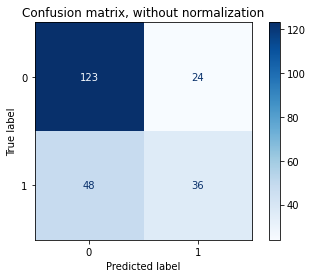

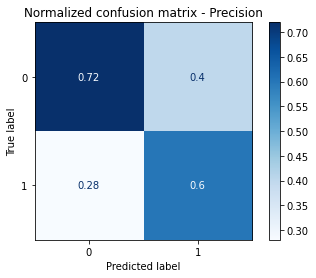

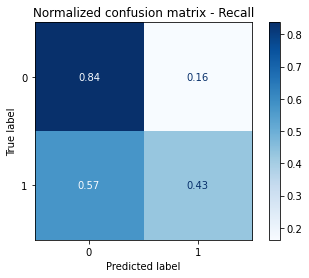

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

mlp_norm = MLPClassifier(hidden_layer_sizes=(8,8,8),
                        activation='relu',
                        solver='adam',
                        max_iter=500,
                        random_state=40
                       )
mlp_norm.fit(X_train_norm, y_train_norm)
predict_test_norm = mlp_norm.predict(X_test_norm)

print(classification_report(y_test_norm,predict_test_norm))
print()

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix - Precision", 'pred'),
                 ("Normalized confusion matrix - Recall", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mlp_norm, X_test_norm, y_test_norm,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)

plt.show()